<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Programmer en <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

**Résumé** Un bref aperçu de la syntaxe du langage S mis en \oe uvre  dans R : fonctions, instructions de
contrôle et d'itérations, fonction {\tt apply}.

## introduction
R est la version *GNU* du langage S conçu initialement aux *Bell labs* par John Chambers à partir de 1975 dans une syntaxe très proche du langage C. En mars 2017, l'index \href{http://www.tiobe.com/index.php/content/paperinfo/tpci/index.html}{TIOBE} le classe en 14ème position derrière Java (1er) ou Python (5ème) mais devant MATLAB (18) ou SAS (21). 

## Structure de contrôle
Il est important d'intégrer que R, comme Matlab, est un langage interprété donc lent, voire très lent, losqu'il s'agit d'exécuter des boucles. Celles-ci doivent être impérativement évitées dès qu'une syntaxe, impliquant des calculs matriciels ou les commandes de type `apply`, peut se substituer.  

### Structures conditionnelles

    if(condition) {instructions} 

est la syntaxe  permettant de calculer les instructions uniquement si la condition est vraie.

    if(condition) { A } else { B } 
    
calcule les instructions A si la condition est vraie et les instructions B sinon. Dans l'exemple suivant, les
deux commandes sont équivalentes :
   
      if (x>0) y=x*log(x) else y=0
      y=ifelse(x>0,x*log(x),0)

### Structures itératives
Ces commandes définissent des boucles pour exécuter plusieurs fois une instruction ou un bloc d'instructions. Les trois types de boucle sont :
    
    for (var in seq) { commandes }
    while (condition) { commandes }
    repeat { commandes ; if (condition) break }

Dans une boucle `for`, le nombre d'itérations est fixe alors qu'il peut être infini pour les boucles `while` et `repeat`! 

La condition est évaluée avant toute exécution dans `while` alors que `repeat` exécute au moins une fois les commandes.

In [1]:
for (i in 1:10) print(i)
y=z=0;
for (i in 1:10) {
   x=runif(1)
   if (x>0.5) y=y+1
   else z=z+1 }
y;z

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


[1] 7

[1] 3

In [2]:
for (i in c(2,4,5,8)) print(i)

[1] 2
[1] 4
[1] 5
[1] 8


In [3]:
x = rnorm(100)
y = ifelse(x>0, 1, -1) # condition
y;i=0

[1]  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1
 [26]  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1
 [51]  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1
 [76] -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1

In [4]:
while (i<10){
   print(i)
   i=i+1}

[1] 0
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9


**Questions**

1.  Que pensez-vous de : 
        for (i in 1:length(b)) a[i]=cos(b[i])
2.  Obtenir l'équivalent de y et z dans la deuxième boucle `for` ci-dessus mais sans  boucle.
3.  Dans l'enchaînement de commandes ci-dessous, supprimer d'abord la boucle `for` sur `j` puis les 2 boucles.

In [5]:
M=matrix(1:20,nr=5,nc=4)
res=rep(0,5)
for (i in 1:5){
   tmp=0
   for (j in 1:4) {tmp = tmp + M[i,j]}
res[i]=tmp}
res

[1] 34 38 42 46 50

**Réponses**

1. Cette boucle est inutile. Il suffit de saisir \code{a=cos(b)}. L'élément de base de R est la matrice dont le vecteur est un cas particulier.
2. Une solution consiste à sommer les éléments `TRUE` d'un vecteur logique 

In [6]:
x=runif(10);y=sum(x>0.5)
z=10-y
y;z

[1] 6

[1] 4

3.Suppression de boucles

   - Boucle `for` sur `j`

In [7]:
for (i in 1:5) res[i]=sum(M[i,])
res

[1] 34 38 42 46 50

   - Deux boucles

In [8]:
res=apply(M,1,sum)
res

[1] 34 38 42 46 50

## Fonctions
### Principes
Il est possible sous R de construire ses propres fonctions. Il est conseillé d'écrire sa fonction dans un fichier `nomfonction.R`.  

    source("nomfonction.R")
    
a pour effet de charger la fonction dans l'environnempent de travail.  Il est aussi possible de définir directement la fonction par la syntaxe suivante :

    nomfonction=function(arg1[=exp1],arg2[=exp2],...)
        {
        bloc d'instructions
        sortie = ...
        return(sortie)
        }

Les accolades signalent le début et la fin du code source de la fonction, les crochets indiquent le caractère facultatif des valeurs par défaut des arguments. L'objet sortie contient le ou les résultats retournés par la fonction, on peut en particulier utiliser une liste pour retourner plusieurs résultats.

### Exemples
Création d'une fonction élémentaire.

In [36]:
MaFonction=function(x){x+ 2; x -2; return (x) }
ls()

[1] "Calcule"      "fibo"         "filtre.NA"    "Fonction2"    "i"           
 [6] "iris"         "j"            "ligne.NA"     "M"            "MaFonction"  
[11] "matrice.test" "ratio"        "rectangle"    "res"          "resultat"    
[16] "tmp"          "x"            "y"            "z"

In [37]:
MaFonction
exp

function(x){x+ 2; x -2; return (x) }

function (x)  .Primitive("exp")

In [38]:
MaFonction(3)

[1] 3

In [39]:
x = MaFonction(4);x

[1] 4

Gestion des paramètres avec une valeur par défaut.

In [41]:
Fonction2=function(a,b=7){a+b}

Fonction2(2,b=3)

[1] 5

In [42]:
Fonction2(5)

[1] 12

Résultats multiples dans un objet de type liste. 

In [43]:
Calcule=function(r){
    p=2*pi*r;s=pi*r*r;
    list(rayon=r,perimetre=p,
    surface=s)}
resultat=Calcule(3)
resultat$ray

[1] 3

In [16]:
2*pi*resultat$r==resultat$perim
resultat$surface

[1] TRUE

[1] 28.27433

**Questions**
1. le recours à un objet de type `list` est-il indispensable pour la fonction `Calcule()` ?
2. Ecrire une fonction qui calcule le périmètre et la surface d'un rectangle à partir des longueurs l1 et l2 des deux côtés. La fonction renvoie également la longueur et la largeur du rectangle.
3. Ecrire une fonction qui calcule les *n* premiers termes de la suite de Fibonacci:
*u_1=0, u_2=1*, pour tout *n>2,  u_n=u_{n-1}+u_{n-2}*
4. Utiliser cette fonction pour calculer le rapport entre 2 termes consécutifs. Représenter ce rapport en fonction du nombre de termes pour *n=20*. Que constatez-vous ? Avez-vous lu *Da Vinci Code* ?
5. Ecrire une fonction qui supprime les lignes d'un `data.frame` ou d'une matrice présentant au moins une valeur manquante.

**Réponses**

1. Les 3 éléments à renvoyer étant de type numérique, un vecteur peut suffire.
2. Fonction `rectangle()` (la fonction `rect()` existe déjà):

In [17]:
rectangle=function(l1,l2){
    p=(l1+l2)*2
    s=l1*l2
    list(largeur=min(l1,l2),longueur=max(l1,l2),
    perimetre=p,surface=s)}
rectangle(4,6)

$largeur
[1] 4

$longueur
[1] 6

$perimetre
[1] 20

$surface
[1] 24

3.Utilisation de la fonction pour calculer les n premiers termes de la suite de Fibonacci:

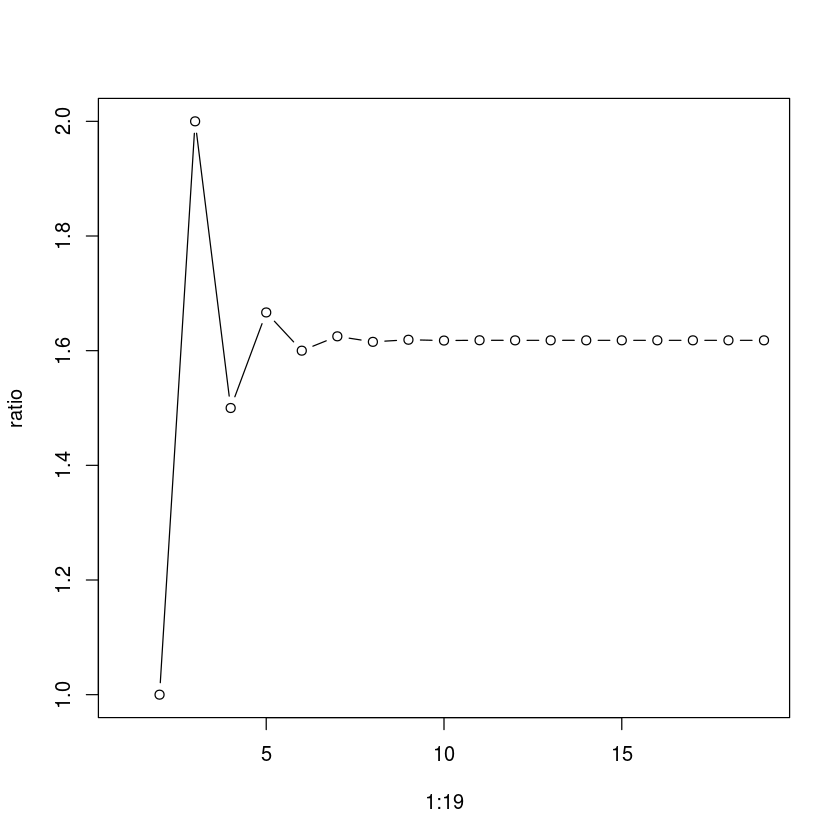

In [18]:
fibo=function(n){
    res=rep(0,n);res[1]=0;res[2]=1
    for (i in 3:n) res[i]=res[i-1]+res[i-2]
    res}
# Calcul du rapport de 2 termes consécutifs
res=fibo(20)
ratio=res[2:20]/res[1:19]
plot(1:19,ratio,type="b")

Le rapport tend vers le nombre d'or $\frac{1+\sqrt{5}}{2} \approx 1.618034$.

4.Une façon, parmi beaucoup d'autres, de répondre à la question consiste à créer une fonction `ligne.NA` qui repère s'il y a au moins une valeur manquante dans un vecteur. Cette fonction filtre les lignes en question.

In [50]:
ligne.NA=function(vec){any(is.na(vec))}
filtre.NA=function(mat){ 
    tmp = apply(mat,1,ligne.NA)
    mat[!tmp,]}
# Application sur une matrice de test
matrice.test = matrix(1:40,nc=5)
matrice.test[2,5]=NA;matrice.test[4,2]=NA
matrice.test[7,1]=NA; matrice.test[7,5]=NA
matrice.test

1,9,17,25,33
2,10,18,26,NA
3,11,19,27,35
4,NA,20,28,36
5,13,21,29,37
6,14,22,30,38
NA,15,23,31,39
8,16,24,32,NA


In [56]:
filtre.NA(matrice.test)


1,9,17,25,33
3,11,19,27,35
5,13,21,29,37
6,14,22,30,38


## Commandes de type `apply`
Comme déjà expliqué, il est vivement recommandé d'éviter les boucles très chronophages. La fonction `apply` et ses variantes sur des vecteurs, matrices ou listes permettent d'appliquer une même fonction `FUN` sur toutes les lignes `(MARGIN=1)` ou les colonnes `(MARGIN=2)` d'une matrice `MAT`:

    apply(MAT , MARGIN, FUN)}

Les fonctions `lapply` et `sapply` calculent la même fonction sur tous les éléments d'un vecteur ou d'une liste.

    lapply(X,FUN, ARG.COMMUN)} 

permet d'appliquer la fonction `FUN` à tous les éléments du vecteur ou de la liste X. Les valeurs de X sont affectées au premier argument de la fonction `FUN`. Si la fonction FUN a plusieurs paramètres d'entrée, ils sont spécifiés dans `ARG.COMMUN`. Cette fonction retourne le résultat sous la forme de listes. 

La fonction `sapply` est similaire à `lapply` mais le résultat est retourné si possible sous forme de vecteurs.

    tapply(X,GRP,FUN,...)
     
applique une fonction `FUN` sur les sous-groupes d'un vecteur `X` définis par une variable  `GRP` de type `factor`. 

Exemples :

In [21]:
data(iris)
apply(iris[,1:4],2,sum)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       876.5        458.6        563.7        179.9

In [22]:
lapply(iris[,1:4],sum)

$Sepal.Length
[1] 876.5

$Sepal.Width
[1] 458.6

$Petal.Length
[1] 563.7

$Petal.Width
[1] 179.9

In [23]:
sapply(iris[,1:4],sum)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       876.5        458.6        563.7        179.9

In [24]:
tapply(iris[,1],iris[,5],sum)

ERROR while rich displaying an object: Error in dn[[2L]]: indice hors limites

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: Erro

setosa versicolor  virginica 
     250.3      296.8      329.4